In [1]:
from ortools.linear_solver import pywraplp

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from itertools import combinations
import time

In [3]:
number_tickets = 10
seating_rows = 7
seating_columns = 7
number_seats = seating_rows * seating_columns
seat_depth = 0.5
seat_depth_gap = 0.2
seat_width = 0.5
seat_width_gap = 0.2

In [4]:
x_seats = np.array( [ (i % seating_columns) * (seat_width + seat_width_gap) + (seat_width / 2) for i in range(number_seats) ] )

In [5]:
y_seats = np.array( [ (i // seating_columns) * (seat_depth + seat_depth_gap) + (seat_depth / 2) for i in range(number_seats) ] )

In [6]:
#ticket_size = np.random.randint(low =1, high = 10, size = number_tickets)
ticket_size = np.ones(number_tickets)

In [7]:
ticket_size

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
def main():
    # Data
    
        
    
    # Solver
    # Create the mip solver with the CBC backend.
    solver = pywraplp.Solver.CreateSolver('assignment_mip', 'CBC')


    # Variables
    # x[i, j] is an array of 0-1 variables, which will be 1
    # if worker i is assigned to task j.
    x = {}
    for i in range(number_seats):
        for j in range(number_tickets):
            x[i, j] = solver.IntVar(0, 1, '')

    # Constraints
    # Each ticekt is assigned to only one seat max
    for i in range(number_seats):
        solver.Add(solver.Sum([x[i, j] for j in range(number_tickets)]) <= 1)
    
    for j in range(number_tickets):
        solver.Add(solver.Sum([x[i, j] for i in range(number_seats)]) <= 1)
        
    # seating distance maintained
    """
    for m, n in combinations(range(number_tickets), 2):
        solver.Add(
                    (
                       ((solver.Sum([ x[i,m] * x_seats[i] for i in range(number_seats)]) 
                       - solver.Sum([ x[i,n] * x_seats[i] for i in range(number_seats)]) ) *  # change to square or do fancy stuff
                        (solver.Sum([ x[i,m] * x_seats[i] for i in range(number_seats)]) 
                       - solver.Sum([ x[i,n] * x_seats[i] for i in range(number_seats)]) ))
                        +
                        ((solver.Sum([ x[i,m] * y_seats[i] for i in range(number_seats)]) 
                       - solver.Sum([ x[i,n] * y_seats[i] for i in range(number_seats)]) ) * 
                        (solver.Sum([ x[i,m] * y_seats[i] for i in range(number_seats)]) 
                       - solver.Sum([ x[i,n] * y_seats[i] for i in range(number_seats)]) ))
                        
                    ) >= 4
                )
    """
    """
    for i in range(number_seats - 3):
        for j in range(number_tickets - 3):
            #solver.Add(solver.Sum([ x[p,q] for p in range(i, i+3) for q in range(j, j+3)]) <= 1)
            solver.Add(solver.Sum([ x[p+q*seating_rows,j] for p in range(i, i+3) for q in range(0, 3)]) <= 1)
    """
    """
    for a in range(seating_rows - 2):
        for b in range(seating_columns - 2):
            first_seat_num = a*seating_columns + b
            seat_nums = [first_seat_num + y + z*seating_columns for y in range(0,3) for z in range(0,3)]
            solver.Add(solver.Sum([x[p,q] for p in seat_nums for q in range(number_tickets)])<=1)
    """
    
    for a, b in combinations(range(number_seats), 2):
        if (x_seats[a] - x_seats[b])**2 + (y_seats[a] - y_seats[b])**2 < 4:
            solver.Add(solver.Sum([ x[a,j] + x[b,j] for j in range(number_tickets)]) <= 1)

    # Objective
    objective_terms = []
    for i in range(number_seats):
        for j in range(number_tickets):
            objective_terms.append(ticket_size[j] * x[i, j])
    solver.Maximize(solver.Sum(objective_terms))

    # Solve
    status = solver.Solve()
    
    #sol_matrix
    soln_matrix = np.zeros((number_seats, number_tickets))
    # Print solution.
    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print('Total cost = ', solver.Objective().Value(), '\n')
        for i in range(number_seats):
            for j in range(number_tickets):
                # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
                if x[i, j].solution_value() > 0.5:
                    #print('Worker %d assigned to task %d.  Cost = %d' %
                          #(i, j, costs[i][j]))
                        print(i,j)
                        soln_matrix[i,j] = 1# creating and returning the solution in grid / matrix form
        return(soln_matrix)
    else:
        return status


In [9]:
t1 = time.time()
soln = main()
t2 = time.time()
t2-t1

Total cost =  9.0 

0 9
3 0
6 4
21 5
24 6
27 7
42 3
45 1
48 2


417.9674825668335

In [10]:
soln = soln.sum(axis=1).reshape((seating_rows,seating_columns))

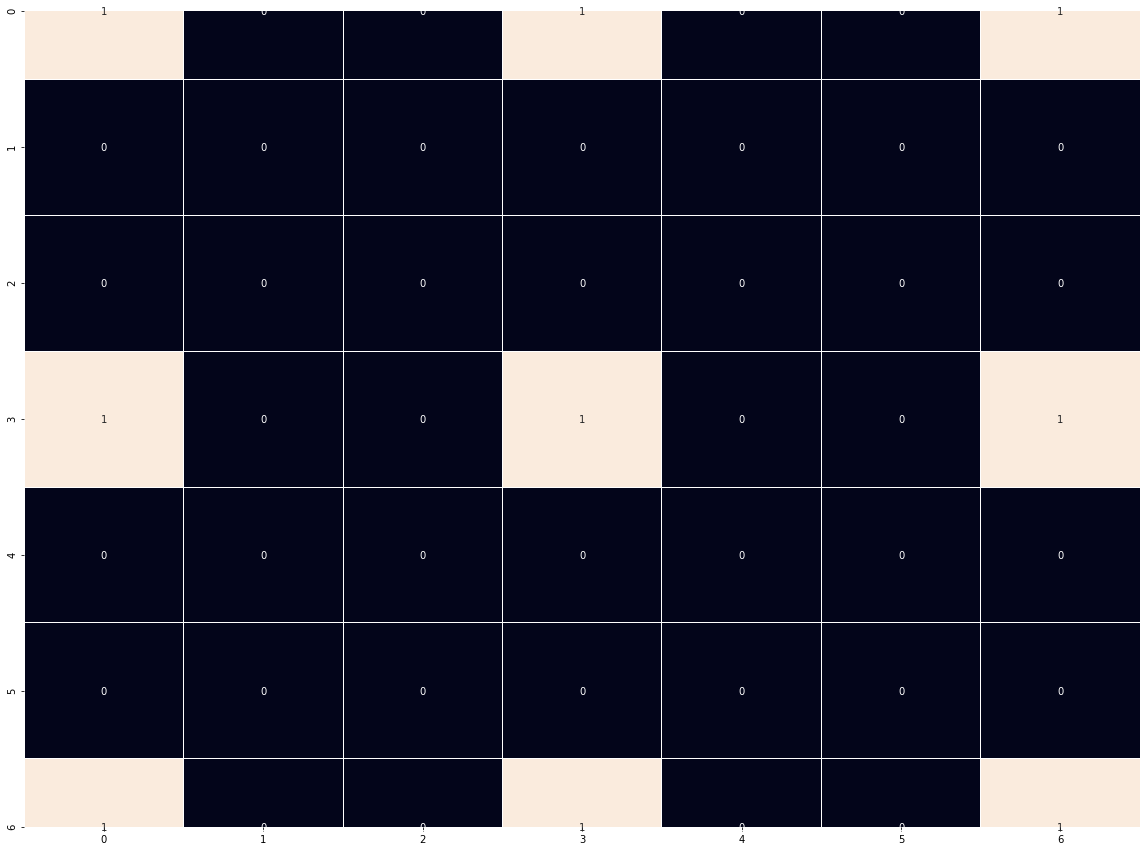

In [11]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(soln, linecolor = 'white', linewidths = 0.1, annot = True, ax = ax, cbar =False)

In [44]:
soln.sum()

50.0